# Numerical Integration

Write a program to calculate the integral of a function using both the trapezoidal rule and the rectangular rule. That is, we want to calculate an approximation to
\begin{equation}
I = \int_a^b f(x)dx
\end{equation}
which is the area under the curve as shown below
<img src="integralab.png" width="200"/>

We can usually approximate integrals by numerical techniques, by splitting the the area up into slices and then adding up the slices. More, thinner slices, is equivalent to a closer approximation, but is also more work when doing the approximation by hand. Automating this is a perfect job for a computer.

You should write a program that first defines the the limits of the integral (i.e. the values a and b in the equation) and the number of slices / integral divisions. Please don't simply use a library function to compute these integrals - we want to see you implement the algorithms for both the rectangular and trapezoidal rule (explained below).

Your program should calculate the integrals of $f(x) = x$ , $f(x) = sinx$ and $f(x) = e^{-x} sinx$ between $a=0$ and $b=1$ using both rules. You should output the value of the approximation for $n=2$ (two slices) up to $n=100$, and graph the result at each stage, showing how the answer approaches the correct value.

### Rectangular Rule
This works by dividing the area under the curve into rectangular slices as shown below.

<img src="integral1.png" width="200"/>

Let’s take an example of how to apply this to calculate the integral 􏰄$\int_0^1 x^3dx$ for $n = 2$. We first calculate the step size $h = (b − a)/n = (1 − 0)/2 = 0.5$. We now add the two rectangles to get an approximate integral 

\begin{equation}
I = f(x_1)h+f(x_2)h = f(0) \times 0.5 + f(0.5) \times 0.5
\end{equation}

\begin{equation}
= 0 \times 0.5+0.125 \times 0.5 = 0.0625
\end{equation}


We can also do the same for $n=4$, in the figure below $h=(1-0)/4 = 0.25$

<img src="integral2.png" width="200"/>

and the approximate integral is found from adding up 4 slices

\begin{equation}
I = f(x_1)h+f(x_2)h+f(x_3)h+f(x_4)h 
\end{equation}

\begin{equation}
= f(0) \times 0.25 + f(0.25) \times 0.25 + f(0.5) \times 0.25+ f(0.75) \times 0.25
\end{equation}

\begin{equation}
= 0 \times 0.25 + 0.015625 \times 0.25 + 0.125 \times 0.25 + 0.421875 \times 0.25 = 0.140625
\end{equation}

If we were to work this integral out by hand, we would see that the exact answer is 0.25. As we increase $n$ we are at least getting closer to 0.25, although the approximation isn't great.


### Trapeziodal Rule

The trapezoidal rule approximates the integral by constructing **trapezoids** under the function, as shown below. It is clear that this provides a more accurate approximation of the integral.

<img src="integral3.png" width="200"/>

Let’s take an example of how to apply this to calculate the integral 􏰄$\int_0^1 x^3dx$ for $n = 2$. As above, we calculate the step size $h = (b − a)/n = (1 − 0)/2 = 0.5$. We now add the two *trapeziods* to get an approximate integral (double check the formula to ensure that you see why it works)

\begin{equation}
I = \frac{h}{2}\left[{f(x_1)+2f(x_2)+f(x_3)}\right]
\end{equation}

\begin{equation}
= \frac{0.5}{2}\left[{f(0)+2f(0.5)+f(1.0)}\right] = 0.3125
\end{equation}


We can also do the same for $n=4$, in the figure below $h=(1-0)/4 = 0.25$

<img src="integral2.png" width="200"/>

and the approximate integral is found from adding up 4 slices

\begin{equation}
I = \frac{h}{2}\left[{f(x_1)+2f(x_2)+2f(x_3)+2f(x_4)+f(x_5)}\right]
\end{equation}

\begin{equation}
= \frac{0.25}{2}\left[{f(0)+2f(0.25)+2f(0.5)+2f(0.75)+f(1.0)}\right]
\end{equation}

\begin{equation}
= 0.125\left[{0+ 2\times 0.015625 + 2 \times 0.125 + 2 \times 0.421875 +1}\right] = 0.265625
\end{equation}

Obviouilsy after only 4 slices, we are already closely approaching the correct answer.

### Testing

The obvious way to test your program is to compare your results against integrals you have performed by hand. For example, in the results shown above we know the exact result to be 0.25 and we can see that they are converging to the exact result as $n$ is increased.

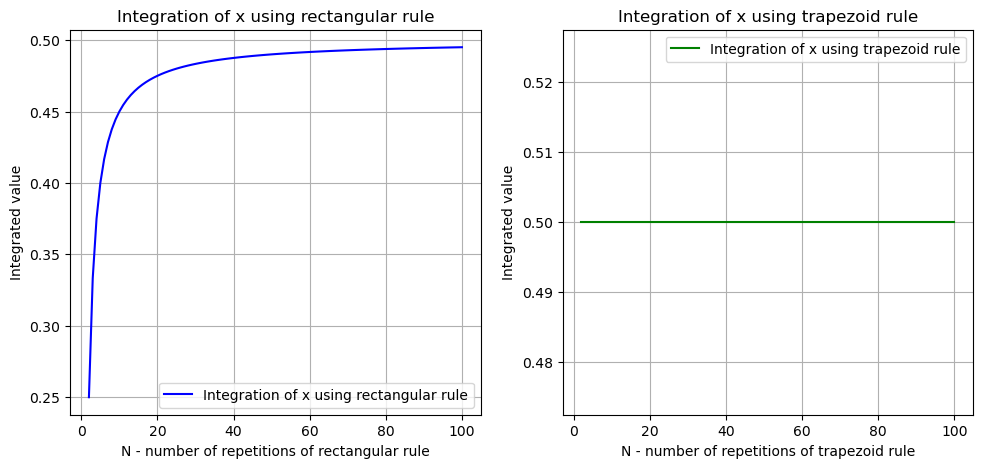

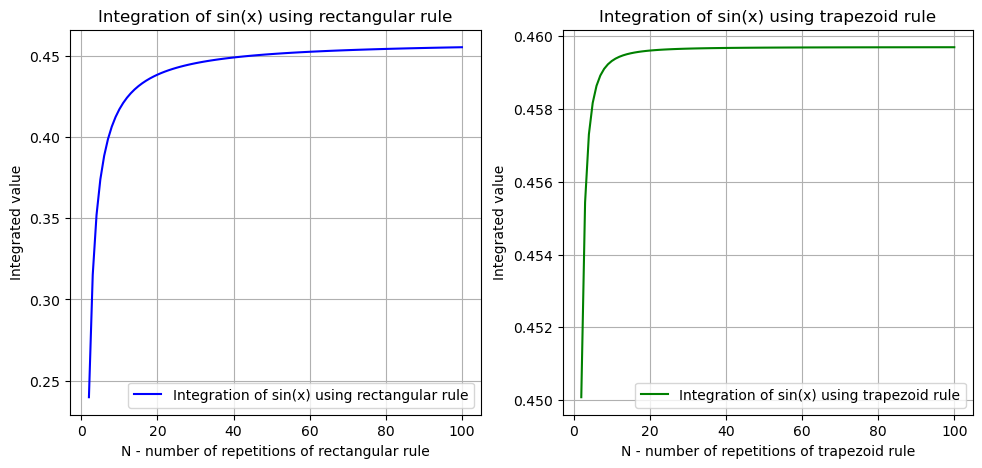

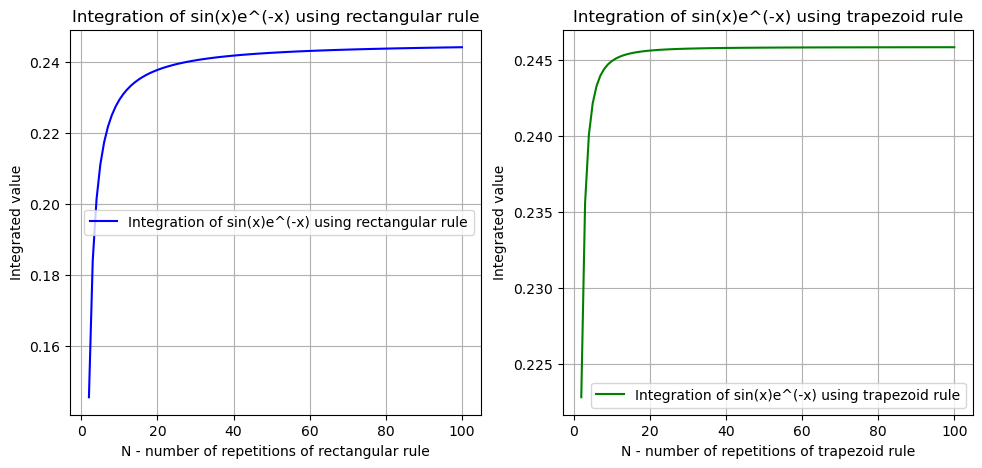

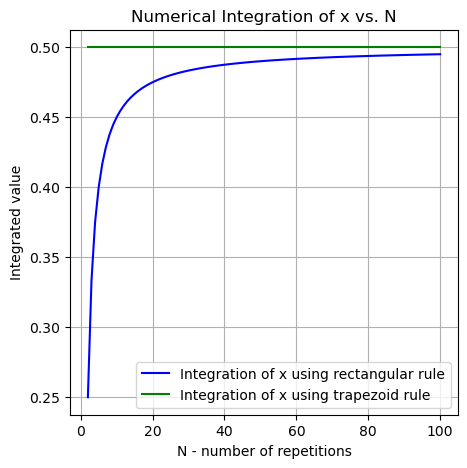

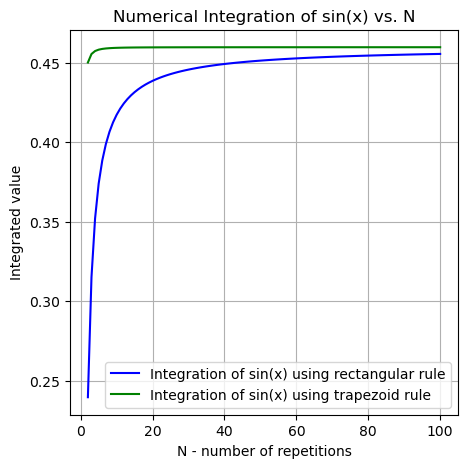

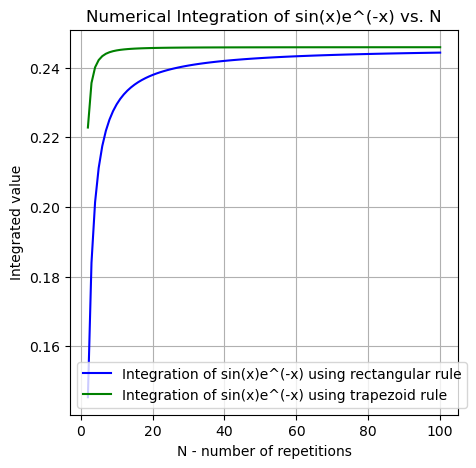

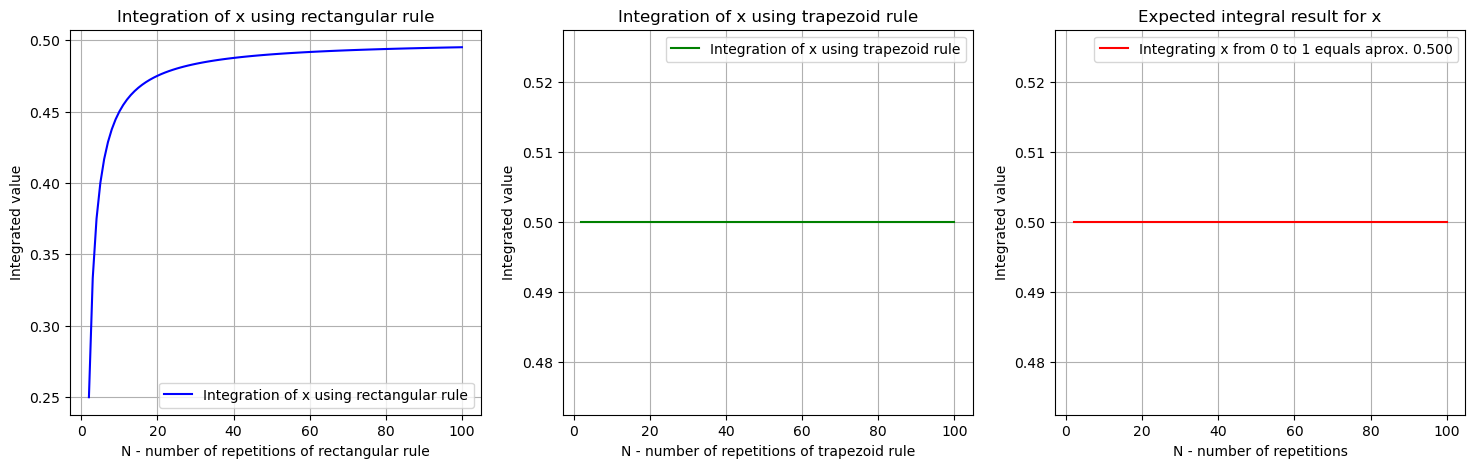

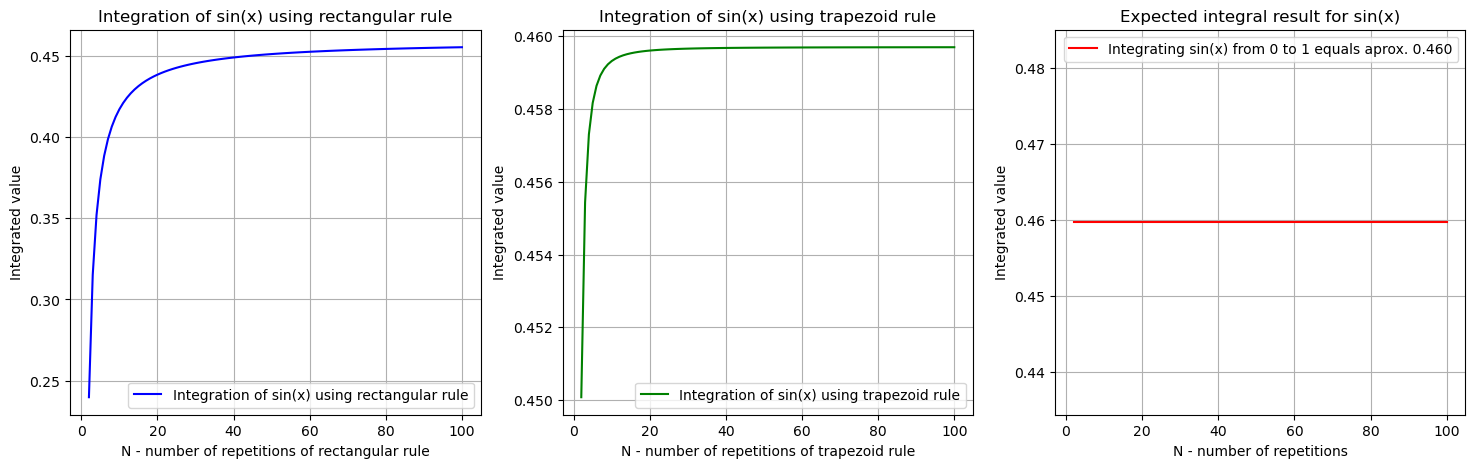

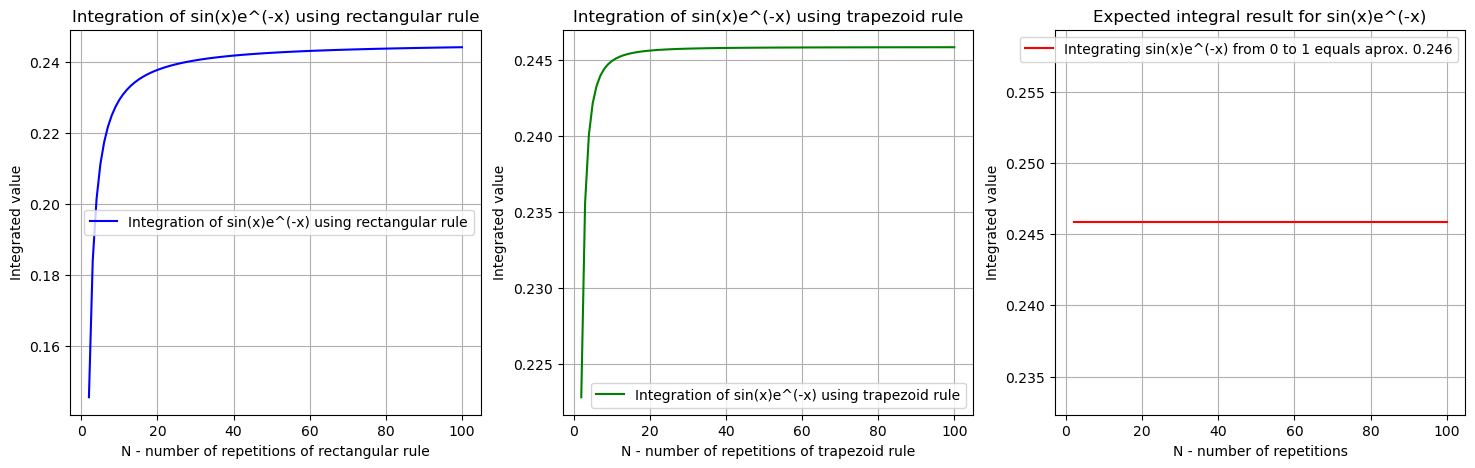

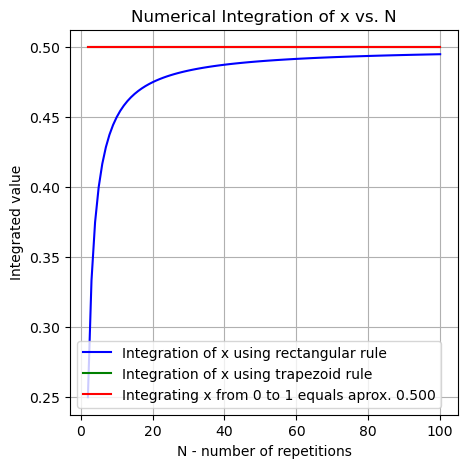

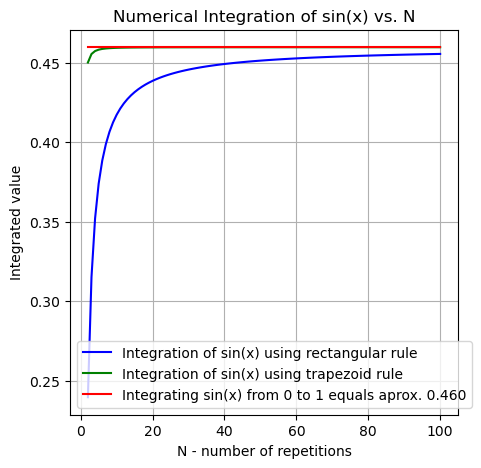

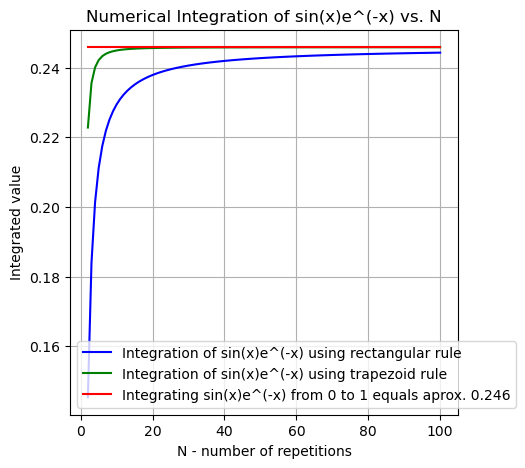

In [4]:
#==============================================
#Trapezoidal and Rectangular integration project
#==============================================

import os 
import numpy as np
import matplotlib.pyplot as plt

#Note: The graph_creating functions rely on a Graphs folder in the directory (for convenience) I'm adding the folder using os automatically
os.makedirs("Numerical Integration Graphs", exist_ok=True)

#=====================
#Implement all required functions to-be-integrated here (as well as their integrated counterparts for visual clarity in graphs): add to these functions to expand library of possible integrations

    #===Sin(x)===
def function_sinx(x):
    return np.sin(x)

def integrated_sinx(x):
    return (-1)*(np.cos(x))

    #===X===
def function_x(x):
    return x

def integrated_x(x):
    return 0.5*x**2

    #===Sin(x)eˆ-x===
def function_e_sinx(x):
    return (np.sin(x)*(np.e**(-x)))

def integrated_e_sinx(x):
    return (-(np.sin(x)+np.cos(x))*(0.5*np.e**(-x)))

#There are other test functions I used to test my algorithm:

    #===3x+9=====
def function_3x_9(x):
    return (3*x+9)

def integrated_3x_9(x):
    return (1.5*x**2+9*x)

def function_sqrt_sin3(x):
    return np.sqrt(1+(np.sin(x)**3))

def function_xˆ2(x):
    return x**2

def function_xˆ6(x):
    return x**6
#=====================

#Implement rectangular rule for any above defined function for any number of n-iterations

def rectangular_rule(function, a, b, n):
    step_size = (b-a)/n
    approximation = 0
    for i in range(n):
        approximation += function(a+i*step_size)*step_size
    return approximation

#Implement trapezoid rule for any above defined function for any number of n-iterations

def trapezoid_rule(function, a, b, n):
    step_size = (b-a)/n
    approximation = function(a)+function(b)
    for i in range(n-1):
        approximation+= 2*function(a+(i+1)*step_size)
    return (step_size/2)*approximation
    
#Implement the functions that call the rules n-number of times and plots the results

def graph_subplot(function, a, b, n_min, n_max, function_name, integrated_function):
    #Create independant range variable n and the figure
    n_values = range(n_min, n_max + 1)  
    plt.figure(figsize=[18,5])
    # Calculate the integrated values using both rules and the expected value using traditional methods
    approximations_trapezoid = [trapezoid_rule(function, a, b, n) for n in n_values]  
    approximations_rectangular = [rectangular_rule(function, a, b, n) for n in n_values]      
    #Create first subplot of integrated values vs n using rectangular rule
    plt.subplot(1,3,1)
    plt.plot(n_values, approximations_rectangular, color='blue', label='Integration of {0} using rectangular rule'.format(function_name))
    plt.xlabel('N - number of repetitions of rectangular rule')
    plt.ylabel('Integrated value')
    plt.title('Integration of {} using rectangular rule'.format(function_name))
    plt.legend()
    plt.grid()
    #Create second subplot of integrated values vs n using trapezoid rule
    plt.subplot(1,3,2)
    plt.plot(n_values, approximations_trapezoid, color='green', label='Integration of {0} using trapezoid rule'.format(function_name))
    plt.xlabel('N - number of repetitions of trapezoid rule')
    plt.ylabel('Integrated value')
    plt.title('Integration of {} using trapezoid rule'.format(function_name))
    plt.grid()
    plt.legend()
    #If the integrated function was given then create third plot showing the expected value of the integration - if no function was given then plot nothing
    if integrated_function:
        plt.subplot(1,3,3)
        expected_value = integrated_function(b) - integrated_function(a)
        expected_value_plot = [expected_value] * len(n_values)
        plt.plot(n_values, expected_value_plot, color='red', label='Integrating {0} from {1} to {2} equals aprox. {3:.3f}'.format(function_name, a, b, expected_value))
        plt.xlabel('N - number of repetitions')
        plt.ylabel('Integrated value')
        plt.title('Expected integral result for {}'.format(function_name))
        plt.legend()
        plt.grid()
    #Save subplot graphs to the 'Numerical Integration Graphs' folder, separate cases with and without expected value 
    if integrated_function: 
        plt.savefig("Numerical Integration Graphs/SubplotGraphsOf_{}_WithExpectedValue.png".format(function_name))
    else: 
        plt.savefig("Numerical Integration Graphs/SubplotGraphsOf_{}.png".format(function_name))


def graph_multicurve(function, a, b, n_min, n_max, function_name, integrated_function):
    #Create independant variable n and the figure
    n_values = range(n_min, n_max + 1)  
    plt.figure(figsize=[5,5])
    # Calculate the integrated values 
    approximations_trapezoid = [trapezoid_rule(function, a, b, n) for n in n_values]  
    approximations_rectangular = [rectangular_rule(function, a, b, n) for n in n_values]  
    #Plot curves of both estimations as well as the expected value on one graph
    plt.plot(n_values, approximations_rectangular, color='blue', label='Integration of {0} using rectangular rule'.format(function_name))
    plt.plot(n_values, approximations_trapezoid, color='green', label='Integration of {0} using trapezoid rule'.format(function_name))
    #If an integrated function for the expected value was given, calculate the value and plot it
    if integrated_function: 
        expected_value = integrated_function(b) - integrated_function(a)
        expected_value_plot = [expected_value] * len(n_values)
        plt.plot(n_values, expected_value_plot, color='red', label='Integrating {0} from {1} to {2} equals aprox. {3:.3f}'.format(function_name, a, b, expected_value))
    plt.xlabel('N - number of repetitions')
    plt.ylabel('Integrated value')
    plt.title('Numerical Integration of {} vs. N'.format(function_name))        
    plt.legend()
    plt.grid()
    #Save multicurve graph to the 'Numerical Integration Graphs' folder, separate cases with and without expected value 
    if integrated_function: 
        plt.savefig("Numerical Integration Graphs/MulticurveGraphOf_{}_WithExpectedValue.png".format(function_name))
    else: 
        plt.savefig("Numerical Integration Graphs/MulticurveGraphOf_{}.png".format(function_name))


#=====Function Read_me=====

#Use the above crafted code to show the integration of all three functions using both assumption algorithms and compare with the expected value (optional)

#Both functions can be called using the following parameter guide:
#graph_xxx(function to integrate (see list above), a, b, min n-value, max n-value, function name or equation (used for text purposes only), the pre-integrated function using traditional methods)
#If you don't want to create the integrated function to compare with the two estimates, simply put "False" in the integrated function parameter when calling the graphing functions

#To see the curves of each integration rule compared separate subplots use: graph_subplot(): 

#To see the curves of each integration rule compared on one graph use: graph_multicurve(): 

#All plotted graphs will be exported and located in a "Numerical Integration Graphs" folder in the same directory as this notebook

#======End of Read_me=====


#====Required function calls====:

graph_subplot(function_x,0,1,2,100, "x", False)

graph_subplot(function_sinx,0,1,2,100, "sin(x)", False)

graph_subplot(function_e_sinx,0,1,2,100, "sin(x)e^(-x)", False)

graph_multicurve(function_x,0,1,2,100, "x", False)

graph_multicurve(function_sinx,0,1,2,100, "sin(x)", False)

graph_multicurve(function_e_sinx,0,1,2,100, "sin(x)e^(-x)", False)


#====Required function calls with optional expected integral value====:

graph_subplot(function_x,0,1,2,100, "x", integrated_x)

graph_subplot(function_sinx,0,1,2,100, "sin(x)", integrated_sinx)

graph_subplot(function_e_sinx,0,1,2,100, "sin(x)e^(-x)", integrated_e_sinx)

graph_multicurve(function_x,0,1,2,100, "x", integrated_x)

graph_multicurve(function_sinx,0,1,2,100, "sin(x)", integrated_sinx)

graph_multicurve(function_e_sinx,0,1,2,100, "sin(x)e^(-x)", integrated_e_sinx)


#====Other test cases====:

#graph_subplot(function_3x_9,0,1,2,100, "3x + 9", False)

#graph_multicurve(function_3x_9,0,1,2,100, "3x + 9", False)

#graph_subplot(function_3x_9,0,1,2,100, "3x + 9", integrated_3x_9)

#graph_multicurve(function_3x_9,0,1,2,100, "3x + 9", integrated_3x_9)


#=====SHOW THE PLOTS!=====
plt.show()


#====Notes=====

#The trapezoid rule converges to the correct value much faster, with respect to number of repetitions, and often gets it correct on the first try
#Even though it might be a little more difficult to implement, the algorithm is leagues ahead of the rectangular rule, as the trapezoid approximates the area under graph much more efficiently.